In [ ]:
#Reference https://www.kaggle.com/kredy10/simple-lstm-for-text-classification

FIne tune model
Transfer learning for positive review prediction. Pre-trained model. Transfer learning NLP. 

In [ ]:
#my imports
import numpy as np
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import string
from nltk import pos_tag
import pandas as pd
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_colwidth', -1)
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
pd.set_option("display.max_rows", None, "display.max_columns", None)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
low_pizza_full = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/pizza_low_400%20-%20pizza_low_800.csv")
high_pizza_full = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/pizza_high_400%20-%20pizza_high_400.csv")
low_test = low_pizza_full[300:400]
high_test = high_pizza_full[300:400]
new_test = pd.concat([low_test,high_test], axis=0)
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_test['text'], new_test['rating'], random_state = 0, test_size = .99)

In [ ]:
#Dataframes
high_gpt = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/positive_gpt.csv")
low_gpt = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/93eb3de1fe859e1e74d22d14634266bcc8a896f2/negative_gpt.csv")
add_gpt_high = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/mega_high_df")
add_gpt_low = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/mega_low_df")
high_no_gpt = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/high_pizza_no_gpt.csv")
low_no_gpt = pd.read_csv("https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/main/low_pizza_no_gpt.csv")

In [ ]:
#Key Datasets
genuine_final = pd.concat([high_no_gpt,low_no_gpt], axis = 0)
gpt_only_final = pd.read_csv('https://raw.githubusercontent.com/success81/Synthetic_NLP_Data_Generation_Paper/93eb3de1fe859e1e74d22d14634266bcc8a896f2/total_mega.csv')
best_genuine_and_synthetic = pd.concat([genuine_final,gpt_only_final], axis=0, ignore_index=True)

In [ ]:
#Drop columns
gpt_only_final.drop(["Unnamed: 0"], axis = 1, inplace = True)
best_genuine_and_synthetic.drop(["Unnamed: 0"], axis = 1, inplace = True)
genuine_final.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
#clear nulls
genuine_final = genuine_final.dropna()
gpt_only_final = gpt_only_final.dropna()
best_genuine_and_synthetic = best_genuine_and_synthetic.dropna()

In [ ]:
#Making LSTM Dataframe
lstm = best_genuine_and_synthetic

In [ ]:
lstm.drop(["stars"], axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Positive and negative reviews')

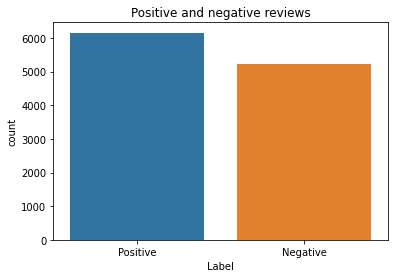

In [ ]:
#Graphic of reviews
sns.countplot(lstm["rating"])
plt.xlabel('Label')
plt.title('Positive and negative reviews')

In [ ]:
#encoding y in main dataset
y = best_genuine_and_synthetic.rating
x = best_genuine_and_synthetic.text
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [ ]:
#encoding y in test set
lstm_y_test = le.fit_transform(new_y_test)
lstm_y_test = lstm_y_test.reshape(-1,1)

In [ ]:
new_y_test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)


In [ ]:
x_train.head(1)

4364     Cheese Pizza slices are made fresh and perfectly cooked - every time! onions, garlic and fresh herbs are tossed together and the result is a delicious smelling mix of veggies, eggs, and spices. it is the coolest thing i have ever done in my life.  i would really recommend this mix to anyone! i mean at the end of the day its the food and service that matters to me and they are a 10 in both!!!" "stopped here for a quick bite before going to dinner. had a delicious slice of pizza with goat cheese, onions, eggplant and heirloom tomatoes. pleasant service also and the place was packed with patrons." "tops is the oddball little neighbourhood dive bar/sports bar that i would be happy to call 
Name: text, dtype: object

In [ ]:
#paramaters
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)


In [ ]:
#Padding
x_sequences = tok.texts_to_sequences(x_train)
x_sequences_matrix = sequence.pad_sequences(x_sequences,maxlen=max_len)

In [ ]:
#Setting RNN
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
#RNN
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
#Fitting LSTM Model
model.fit(x_sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
61/61 [==============================] - 14s 198ms/step - loss: 0.5784 - accuracy: 0.6671 - val_loss: 0.0741 - val_accuracy: 0.9773
Epoch 2/10
61/61 [==============================] - 11s 183ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.0301 - val_accuracy: 0.9922
Epoch 3/10
61/61 [==============================] - 11s 186ms/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0616 - val_accuracy: 0.9855


In [ ]:
#Sequence Matrixing test set
test_sequences = tok.texts_to_sequences(new_x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
#accuracy testing
accr = model.evaluate(test_sequences_matrix,lstm_y_test)

7/7 [==============================] - 0s 20ms/step - loss: 0.5109 - accuracy: 0.8485
